# Maine halibut Star-Oddi DST \#8831 (5 min)

In [1]:
%matplotlib inline
import scipy.io
import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.time import Time

In [2]:
def round_of_rating(number):
    return round(number * 2) / 2

In [3]:
tag=scipy.io.loadmat('/Users/cliu/Dropbox/Geolocation/projects/Halibut/Maine Atlantic halibut analyses/preprocessing/processed_tags/3_raw.mat',squeeze_me =False,struct_as_record=True)
tag=tag['tag']
dnum=tag['dnum'][0,0][:,0]
temp=tag['temp'][0,0][:,0]
depth=tag['depth'][0,0][:,0]
dnum=dnum-678942
# idx=depth>20

# # downsample to 0.5m
# depth = np.array([round_of_rating(i) for i in depth])

data=pd.DataFrame({'dnum':dnum,'temp':temp,'depth':depth})
data['DATE']=Time(data.dnum,format='mjd',scale='utc').datetime
data['DATE']=pd.to_datetime(data['DATE'])
data = data.set_index('DATE')
data.index = data.index.round('S')

# # downsample to 30min
# index = pd.date_range(data.index[0], data.index[-1], freq='30T')
# data = data.reindex(index, method='ffill')

In [4]:
data['depth_change'] = abs(data['depth'].diff())

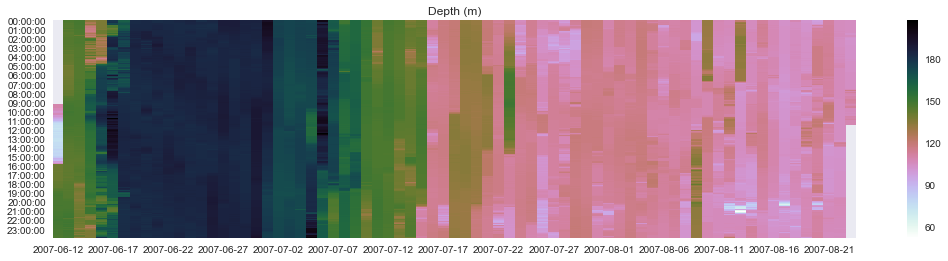

In [5]:
groups = data['depth'].groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
ax = sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=12)
# ax = sns.heatmap(days, cmap='jet', xticklabels=5, yticklabels=12)
plt.title('Depth (m)')

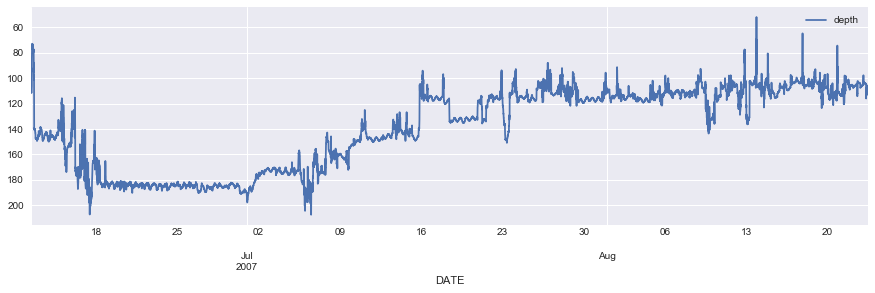

In [6]:
data.plot(y='depth', figsize=(15,4)).invert_yaxis()

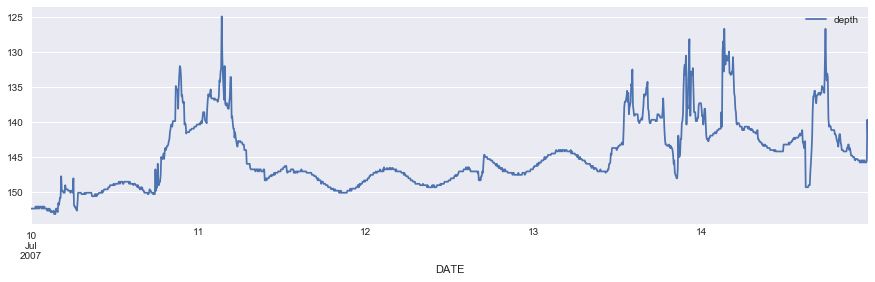

In [7]:
data['2007-7-10':'2007-7-14'].plot(y='depth', figsize=(15,4)).invert_yaxis()

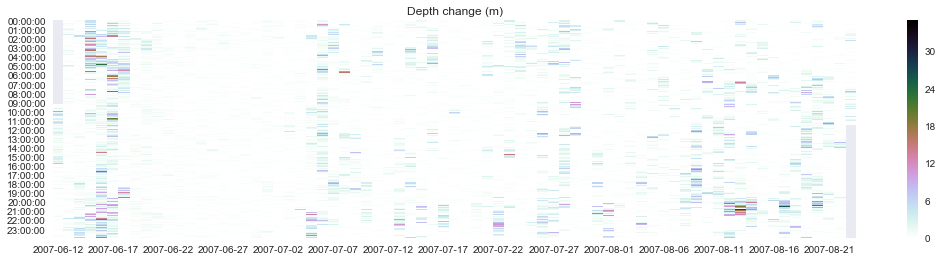

In [8]:
groups = data['depth_change'].groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
ax = sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=12)
plt.title('Depth change (m)')

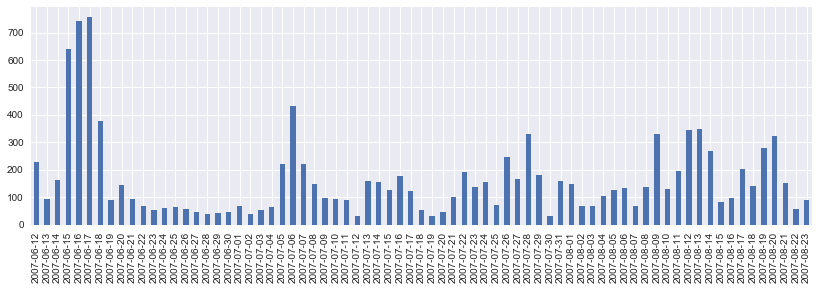

In [9]:
depth_change_sum = np.sum(days, axis=0)
depth_change_sum.plot(kind='bar', figsize=(14,4))

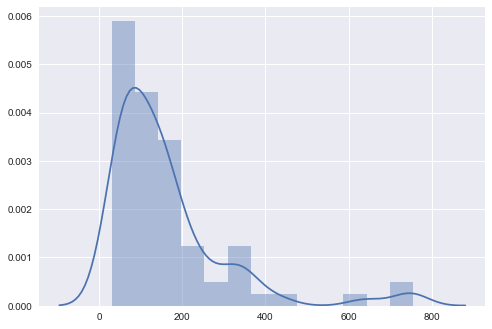

In [10]:
sns.distplot(depth_change_sum)